In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
x = np.random.normal(0,1,(10,2))


array([-1.62630589, -1.23876136])

In [50]:
def test_jac(x):
    return x**2

def sech_sqrd(x):
    #computes sech^2(x)
    return 1-(np.tanh(x))**2

def vRNN_update(x,W):
    return np.tanh(W @ x)

def vRNN_jac(x, W):
    #assumes tanh activation
    return np.diag(sech_sqrd(x)) @ W
    
def run_random_vRNN_sim(n,g,T,p):

    #n: number of neurons
    
    #g: chaos dial

    #T: length of sim

    #p: number of trials

    W = np.random.normal(0,g/np.sqrt(n),(n,n))

    x = np.random.normal(0,1,n)
    
    xsAllTrials = []
    JsAllTrials = []

    for trial in range(p):

        
        xsOneTrial = []
        JsOneTrial = []
        for time in range(T):

            x = vRNN_update(x,W)
            xsOneTrial.append(x)
            JsOneTrial.append(vRNN_jac(x, W))

        xsAllTrials.append(xsOneTrial)
        JsAllTrials.append(JsOneTrial)
    
    xsAllTrials = np.stack(xsAllTrials)
    JsAllTrials = np.stack(JsAllTrials)

    

    return xsAllTrials, JsAllTrials
        





def compute_lyaps_using_QR(states = None,jacs = None,jac_func = None):

    #make sure something is passed in
    if all(v is None for v in {states, jacs,jac_func}):
        raise ValueError('No input to compute_lyaps_using_QR given.')
    
    #make sure if jacobian function is passed in, so are states
    if jac_func is not None:
        assert states is not None, 'Jacobian function supplied but no states given.'

    #make sure if states passed in, so is jacobian function
    if states is not None:
        assert jac_func is not None, 'States given, but no Jacobian function supplied.'

    #jacs expected to be in trial x time x neuron x neuron format
    assert jacs.shape[-1] == jacs.shape[-2], 'jacs not formatted correctly'
    p,T,n = jacs.shape[0],jacs.shape[1],jacs.shape[2]

    

    for trial in p:
        Q = np.eye(n)
        lyaps = np.zeros(n)
        for time in range(T):

            Q_new = Q @ jacs[trial,time]
            Q , R = np.linalg.qr(Q_new)
            lyaps += np.diag(R)
        


            
    


In [49]:
states,jacs = run_random_vRNN_sim(n = 10,g = 1,T = 100,p = 2)

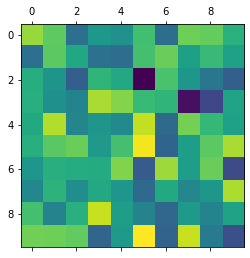